In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/nisar/Desktop/udemy/Simplilearn/Course Material/DL_with_Keras_ and_Tensorflow/My Data/Jupyter Files/gold fund.csv")

In [3]:
df.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
# separate features and outcome variable
x=df.drop(columns=['ID','Gold_Fund'])
y=df.Gold_Fund

In [5]:
# Split and standardise the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
# st.fit(x_train)
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [6]:
x_train_std.shape

(655, 15)

In [7]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision,Recall

In [8]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01,momentum=0.60),
              metrics=['accuracy',Precision(),Recall()])

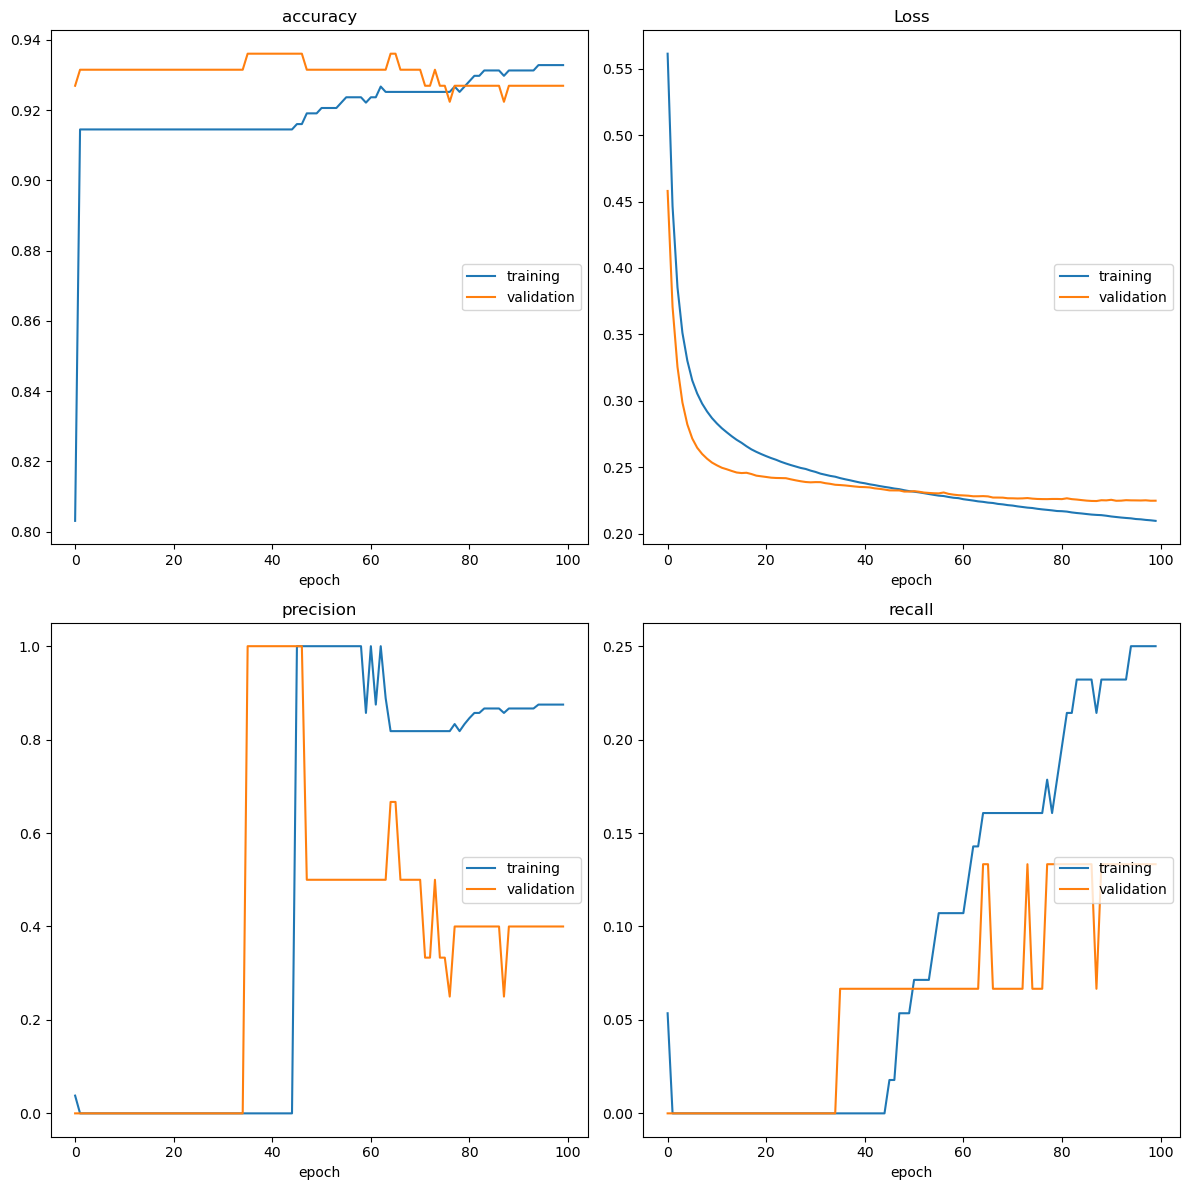

accuracy
	training         	 (min:    0.803, max:    0.933, cur:    0.933)
	validation       	 (min:    0.922, max:    0.936, cur:    0.927)
Loss
	training         	 (min:    0.210, max:    0.561, cur:    0.210)
	validation       	 (min:    0.225, max:    0.458, cur:    0.225)
precision
	training         	 (min:    0.000, max:    1.000, cur:    0.875)
	validation       	 (min:    0.000, max:    1.000, cur:    0.400)
recall
	training         	 (min:    0.000, max:    0.250, cur:    0.250)
	validation       	 (min:    0.000, max:    0.133, cur:    0.133)
11/11 [==============================] - 1s 64ms/step - loss: 0.2097 - accuracy: 0.9328 - precision: 0.8750 - recall: 0.2500 - val_loss: 0.2249 - val_accuracy: 0.9269 - val_precision: 0.4000 - val_recall: 0.1333


In [11]:
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

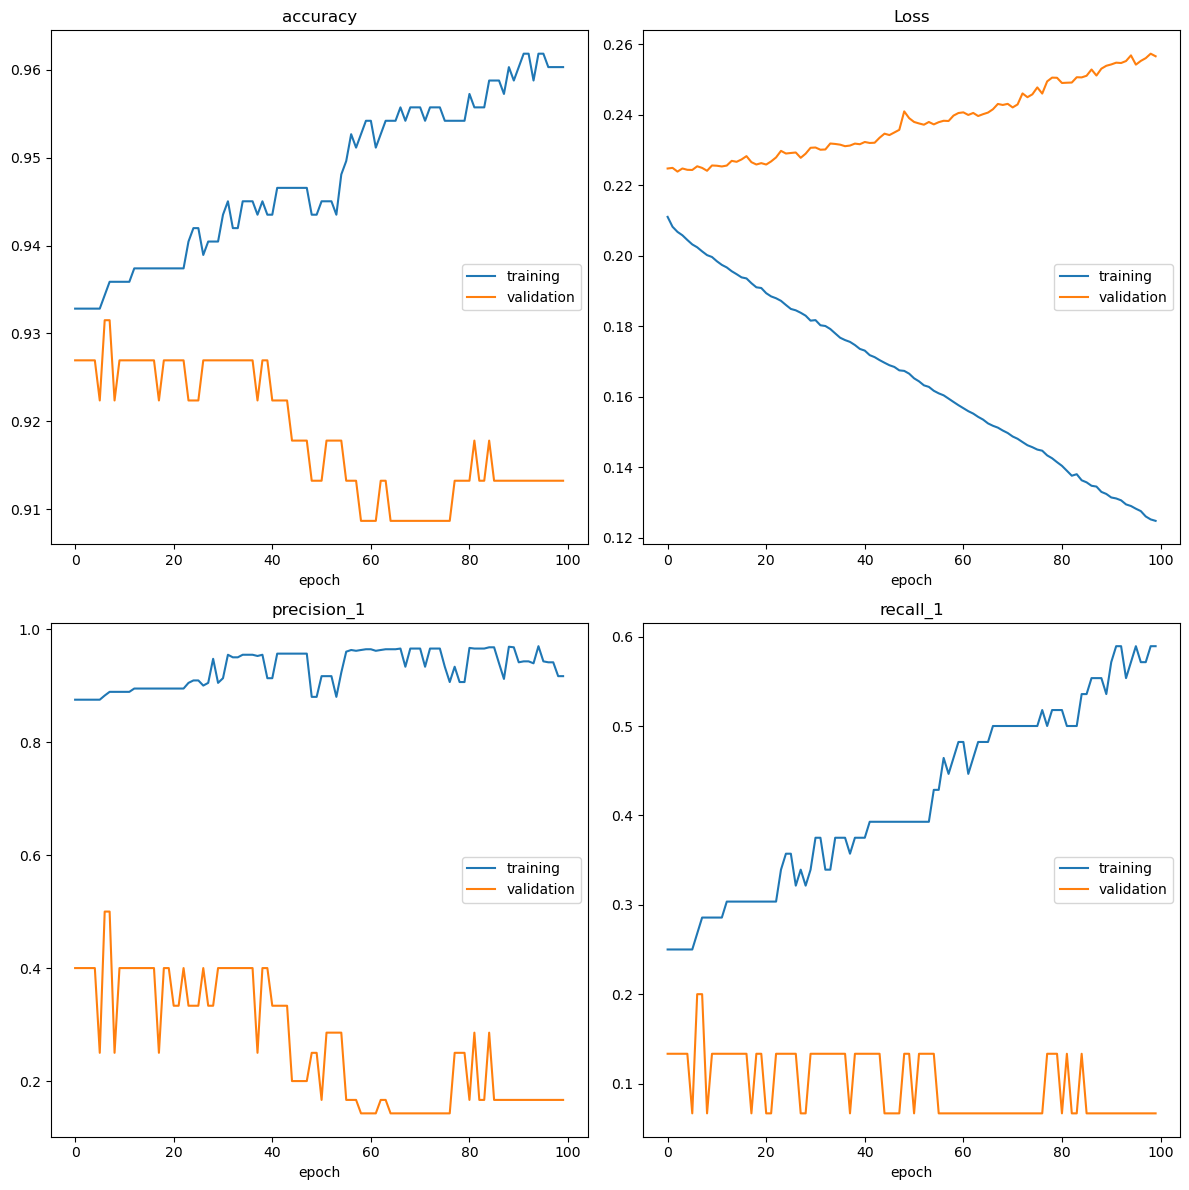

accuracy
	training         	 (min:    0.933, max:    0.962, cur:    0.960)
	validation       	 (min:    0.909, max:    0.932, cur:    0.913)
Loss
	training         	 (min:    0.125, max:    0.211, cur:    0.125)
	validation       	 (min:    0.224, max:    0.257, cur:    0.257)
precision_1
	training         	 (min:    0.875, max:    0.970, cur:    0.917)
	validation       	 (min:    0.143, max:    0.500, cur:    0.167)
recall_1
	training         	 (min:    0.250, max:    0.589, cur:    0.589)
	validation       	 (min:    0.067, max:    0.200, cur:    0.067)
11/11 [==============================] - 1s 61ms/step - loss: 0.1248 - accuracy: 0.9603 - precision_1: 0.9167 - recall_1: 0.5893 - val_loss: 0.2565 - val_accuracy: 0.9132 - val_precision_1: 0.1667 - val_recall_1: 0.0667


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

In [13]:
# Imbalance data
y_train.value_counts()

0    599
1     56
Name: Gold_Fund, dtype: int64

# Apply SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [15]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 803, 1: 71})
Resampled dataset shape Counter({0: 803, 1: 803})


In [16]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1606, 15)
(1606,)


In [17]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [18]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

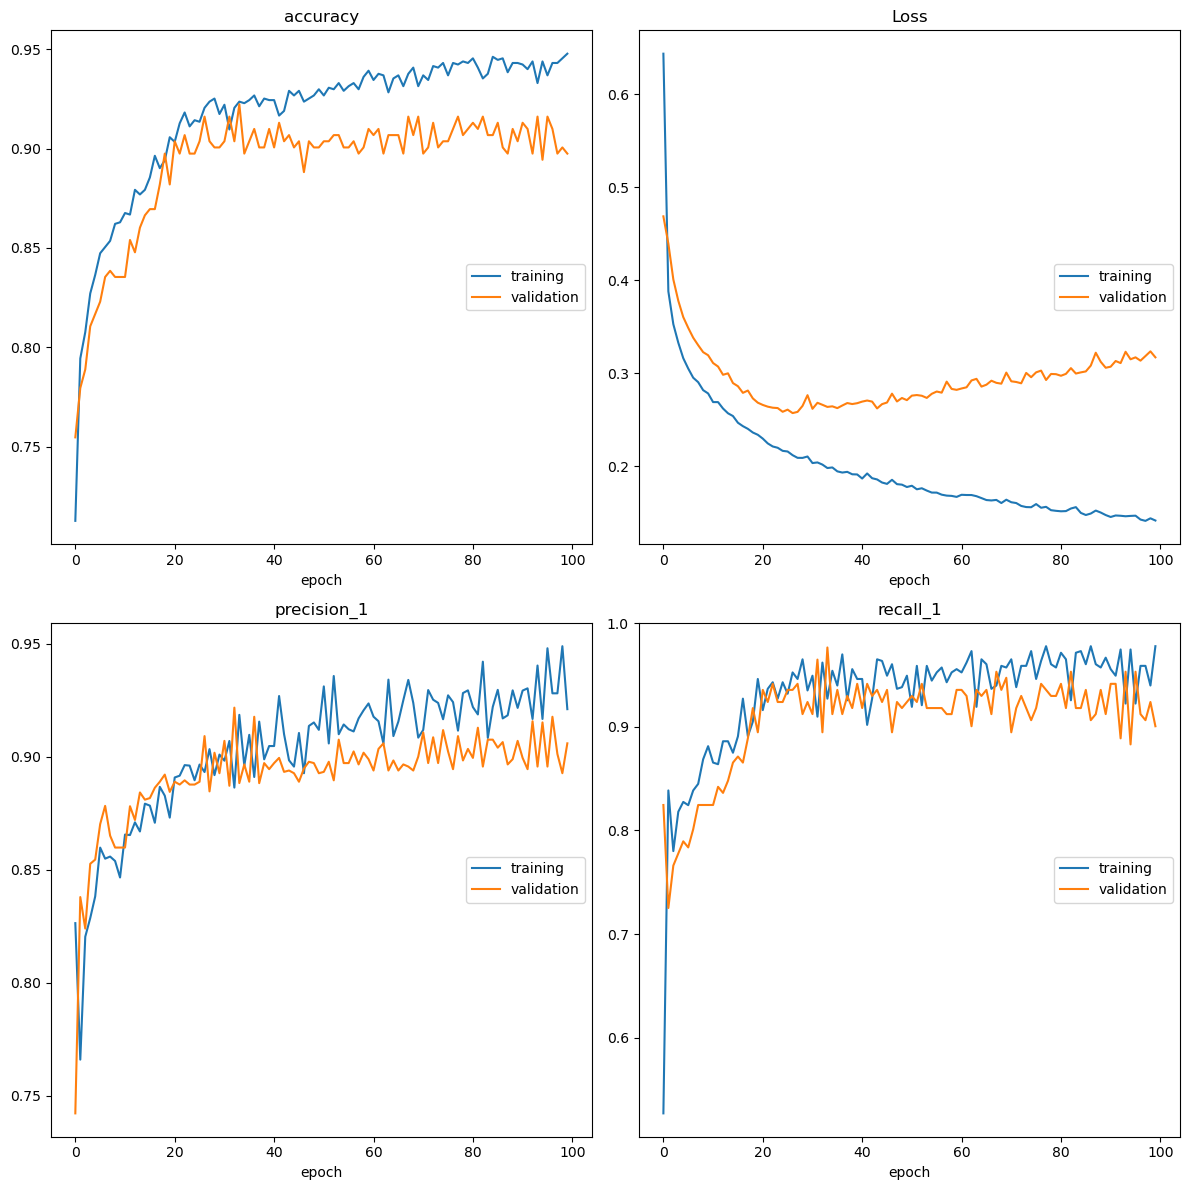

accuracy
	training         	 (min:    0.713, max:    0.948, cur:    0.948)
	validation       	 (min:    0.755, max:    0.922, cur:    0.898)
Loss
	training         	 (min:    0.141, max:    0.644, cur:    0.142)
	validation       	 (min:    0.257, max:    0.469, cur:    0.317)
precision_1
	training         	 (min:    0.766, max:    0.949, cur:    0.921)
	validation       	 (min:    0.742, max:    0.922, cur:    0.906)
recall_1
	training         	 (min:    0.527, max:    0.978, cur:    0.978)
	validation       	 (min:    0.725, max:    0.977, cur:    0.901)
21/21 [==============================] - 1s 33ms/step - loss: 0.1418 - accuracy: 0.9478 - precision_1: 0.9210 - recall_1: 0.9778 - val_loss: 0.3173 - val_accuracy: 0.8975 - val_precision_1: 0.9059 - val_recall_1: 0.9006


In [19]:

model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))

# Random Search

In [20]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [60]:
import keras_tuner

In [69]:
def create_model(hp):
    model=Sequential()
    model.add(Input(shape=(15,)))
    model.add(Dense(hp.Choice('units',[10,15,20,25]),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
    return(model)

In [70]:
tuner=keras_tuner.RandomSearch(create_model,objective='val_loss',max_trials=2)   # if max=4 it become grid search

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [71]:
tuner.search(x_train_std,y_train,epochs=20,validation_data=(x_test_std,y_test))

INFO:tensorflow:Oracle triggered exit


In [72]:
tuner.get_best_models()

In [73]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
Score: 0.37735339999198914
Trial summary
Hyperparameters:
units: 10
Score: 0.41406041383743286
Trial summary
Hyperparameters:
units: 8
Score: 0.44939181208610535


In [74]:
models=tuner.get_best_models(num_models=2)

In [75]:
models

In [76]:
best_model=models[0]

In [77]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________
